<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1.1">Setup</a></span></li></ul></li><li><span><a href="#Imagined-use-case" data-toc-modified-id="Imagined-use-case-2">Imagined use case</a></span><ul class="toc-item"><li><span><a href="#PathManager" data-toc-modified-id="PathManager-2.1">PathManager</a></span></li><li><span><a href="#Import-into-ISIS" data-toc-modified-id="Import-into-ISIS-2.2">Import into ISIS</a></span></li></ul></li></ul></div>

# Introduction

This package can

* download,
* (re-)calibrate, and
* manage the storage

of Cassini ISS data.

Furthermore, it can be used to show ISS data of Saturn rings, with (hopefully) correct ring radius and azimuth as plot axes.
As a special add-on, it uses a data-file of Inner Lindblad Resonances to display them on top of the images.

Note: For the (re-)calibration the user has to have an ISIS environment installed: https://isis.astrogeology.usgs.gov/documents/InstallGuide/index.html

The `pysis` module which is used by `pyciss` will automatically activate it, if it is findable from the shell where the Python/IPython interpreter was launched.

## Setup

Upon the first time, the `pyciss.io` module would be imported, an error will appear saying that

    No configuration file [...] found.
    Please run `pyciss.io.set_database_path()` and provide the path where
    you want to keep your automatically downloaded images.
    `pyciss` will store this path in [...], where you can easily change it later."

When calling the aforementioned function with a path, that path will be used to store the downloaded and managed ISS data.
`managed` refers here to the fact that all later derived data products will automatically be stored in the folder of the respective ISS image_id, under the path that the user provided at this initial setup step.

# Imagined use case

The user might read a paper that uses Cassini ISS data.

A data ID is given, which is:

In [9]:
id_ = 'N1467344745'

## PathManager

The `io` module offers a PathManager, which knows where the data is being stored and offers object attributes with sub-paths to objects inside the respective folder:

In [10]:
from pyciss import io

pm = io.PathManager(id_)

The self-representation of an object in Jupyter notebooks is already useful in this case:

In [11]:
pm

cal_cub: not found.
calib_img: not found.
calib_label: not found.
cubepath: not found.
dst_cub: not found.
raw_cub: not found.
raw_image: /Volumes/USB128II/ciss/db/N1467344745/N1467344745_2.IMG
raw_label: /Volumes/USB128II/ciss/db/N1467344745/N1467344745_2.LBL
tif: not found.
undestriped: not found.

The `downloader` module offers some helpers to get data:

In [12]:
from pyciss import downloader

In [13]:
downloader.download_file_id(id_)

Found 1 obsids.
Downloaded images into /Volumes/USB128II/ciss/db/N1467344745


Now look at the self-representation of the PathManager object again:

In [14]:
pm

cal_cub: not found.
calib_img: not found.
calib_label: not found.
cubepath: not found.
dst_cub: not found.
raw_cub: not found.
raw_image: /Volumes/USB128II/ciss/db/N1467344745/N1467344745_2.IMG
raw_label: /Volumes/USB128II/ciss/db/N1467344745/N1467344745_2.LBL
tif: not found.
undestriped: not found.

## Import into ISIS

In [15]:
downloader.download_and_calibrate(id_)

In [16]:
from osgeo import gdal

In [19]:
ds = gdal.Open(str(pm.raw_label))

In [20]:
%matplotlib nbagg

In [22]:
data = ds.ReadAsArray()

In [25]:
vmin,vmax = np.percentile(data, (1, 99))

<IPython.core.display.Javascript object>


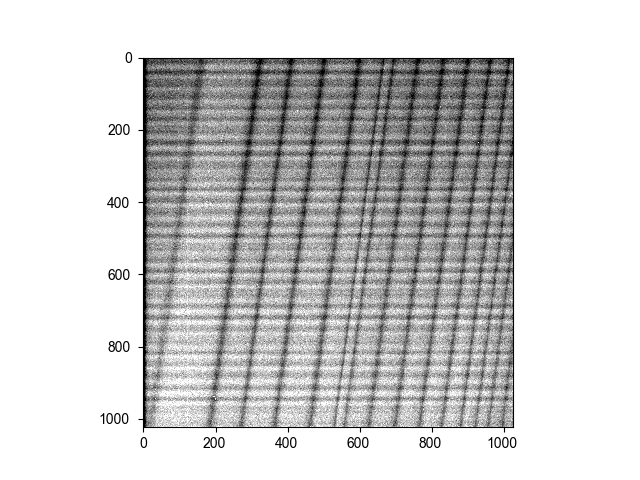

In [27]:
plt.imshow(data, vmin=vmin, vmax=vmax, cmap='gray')

In [28]:
from pyciss.ringcube import RingCube

In [30]:
cube = RingCube(pm.cubepath)

<IPython.core.display.Javascript object>


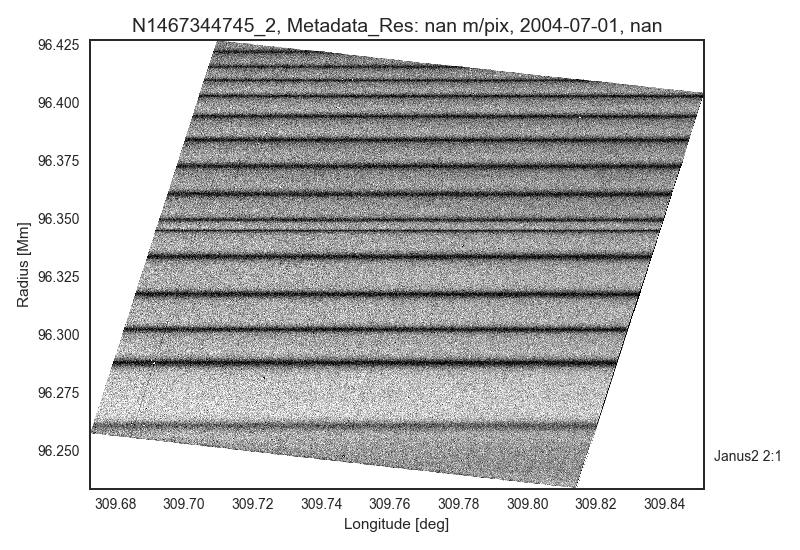

In [31]:
cube.imshow()